In [1]:
import warnings 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Genres in Top 100 Profited Movies

One of a variable that pops into our brain when we hear the question "What is the best type of movie to make for maximum profit?" is genre.

### Import Data

In [2]:
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

### Combine Data Tables

With the two data tables, we will merge them using movie title and year the movie was released so that we can have one dataframe with production budget, worldwide gross, and genres variables. 
There were movies with same title but were not the same movie. So, we also use the year to merge the table as well.

In [3]:
# Create a column for year in movie_budget table
# Since release date is in "month day, year" format, we are going to take only the last four string of the release date and 
# we are going to change the year to float
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])
profit.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017.0,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015.0,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


### Clean the dataframe

The dataframe now needs to be cleaned. We will drop any null values and duplicates from the data table. 

In [4]:
# Drop null values
profit.dropna(inplace=True)

In [5]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'release_date', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [6]:
# Drop any duplicates
condensed_profit = condensed_profit.drop_duplicates(subset=['movie'])

In [7]:
# Change the columns that are string numbers to float
# First, we remove the , by replace , with ''
# Since the production budget, domestic gross, worldwide gross has a dollar sign in the front,
# we want to take every after the dollar sign and make them into floats
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

### Create new columns for Profit and Net Profit Margin

Now, we will use wordwide_gross and production_budget to find the profit of the movie. We also found the net profit margin because we wanted to make sure that the movie generated enough profit from its sales and whether production budget was being contained.

We also created another column of release month so that we can compare what genres suceed in which month.

In [8]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100
condensed_profit['release_month'] = condensed_profit['release_date'].str[:3]

We also created a dataframe that will not have any profit margin filter so that we can use this dataframe to see the relationship of average profit margin and genre.

In [9]:
condensed_profit_no_filter = condensed_profit

The, we want to make sure our data set has movies that have good net profit margin. So we filter the data so that we only have movies that had net profit margin over 70% and sort it by profit.

In [10]:
# Sort by Net Profit Margin (>70%) and Profit
condensed_profit = condensed_profit[condensed_profit['net_profit_margin'] > 70]
condensed_profit = condensed_profit.sort_values(by=['profit'], ascending=False)
condensed_profit.head(10)

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin,release_month
6,Avengers: Infinity War,"Apr 27, 2018","Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522,Apr
33,Jurassic World,"Jun 12, 2015","Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647,Jun
26,The Avengers,"May 4, 2012","Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240,May
41,Black Panther,"Feb 16, 2018","Action,Adventure,Sci-Fi",200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046,Feb
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018","Action,Adventure,Sci-Fi",170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890,Jun
157,Frozen,"Nov 22, 2013","Adventure,Animation,Comedy",150000000.0,400738009.0,1.272470e+09,1.122470e+09,88.211902,Nov
136,Beauty and the Beast,"Mar 17, 2017","Family,Fantasy,Musical",160000000.0,504014165.0,1.259200e+09,1.099200e+09,87.293517,Mar
681,Minions,"Jul 10, 2015","Adventure,Animation,Comedy",74000000.0,336045770.0,1.160336e+09,1.086336e+09,93.622538,Jul
3,Avengers: Age of Ultron,"May 1, 2015","Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443,May
43,Incredibles 2,"Jun 15, 2018","Action,Adventure,Animation",200000000.0,608581744.0,1.242521e+09,1.042521e+09,83.903689,Jun


### Visualization

With the dataframe that was not filtered by >70% profit margin, we want to see the relationship between the average profit margin and each genre. 

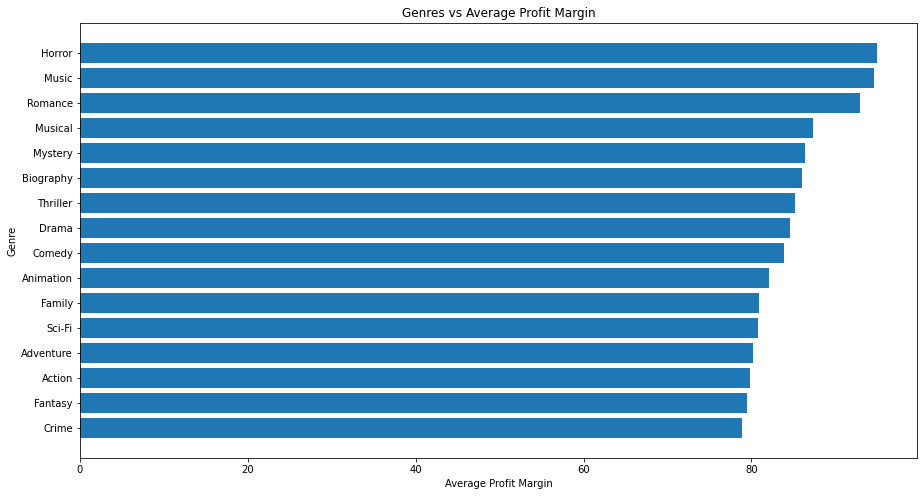

In [19]:
# Make a new dataframe so that we can have all the data with profit margin >= 0
# Then, we want to get just the two columns that we are going to need, genres and profit margin
# Separate the genres of each movie into a list
#condensed_profit_no_profit_margin_range = condensed_profit_no_filter[condensed_profit_no_filter['net_profit_margin'] >= 0]

top100 = condensed_profit.iloc[:100]

genres_profit_margin = top100[['genres', 'net_profit_margin']]
genres_profit_margin['genres'] = genres_profit_margin['genres'].map(lambda x : x.split(','))
warnings.filterwarnings('ignore')

genres_profit_margin_dict = {}

# For each row of the dataframe, loop through each genre in the list of genres
# For each genre, if the genre does exist in the dictionary, append the profit margin in the values to make a list of profit margin for each genre
for index, row in genres_profit_margin.iterrows():
    for genre in row['genres']:
        if genre in genres_profit_margin_dict.keys():
            genres_profit_margin_dict[genre].append(row['net_profit_margin'])
        else:
            genres_profit_margin_dict[genre] = [row['net_profit_margin']]

average_profit_margin_genre = {}

# For each genre, find the average of profit margin
for k,v in genres_profit_margin_dict.items():
    average_profit_margin_genre[k] = sum(v)/ float(len(v))

average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(), key=lambda x : x[1]))


# Make a bar chart to show relationship between profit margin and genres
fig, ax = plt.subplots(figsize=(15, 8))

x = list(average_profit_margin_genre.keys())
height = list(average_profit_margin_genre.values())

ax.barh(x, height)
ax.set_title('Genres vs Average Profit Margin')
ax.set_xlabel('Average Profit Margin')
ax.set_ylabel('Genre')

plt.savefig('images/average_profit_margin_vs_genres.png')


You can see that average profit margin for each genre is above 50%. The graph shows that horror, mystery, and musical has the highest profit margin. However, we cannot just use this information to give recommendations.

Let us look at genres for top 100 budget and top 100 profit to see if the profit margin

In [12]:
budget = condensed_profit.sort_values(by=['production_budget'], ascending=False)
genres_budget = list(budget['genres'].iloc[:100])

top_100_budget_genre_list = []

# Split the genres for each movie
for genre in genres_budget:
    each_genre = genre.split(',')
    for index in range(len(each_genre)):
        top_100_budget_genre_list.append(each_genre[index])

top_100_budget_genre_dict = {}

# Make a dictionary to count number of each genres
for genre in top_100_budget_genre_list:
    if genre in top_100_budget_genre_dict.keys():
        top_100_budget_genre_dict[genre] += 1
    else:
        top_100_budget_genre_dict[genre] = 1
        
# Sort the dictionary by count
top_100_budget_genre_dict = dict(sorted(top_100_budget_genre_dict.items(), key=lambda x : x[1]))


Now, let us look at what genres are popular in the top 100 most profited movies. 

In [13]:
# Make a list of genres from the top 100 rows
genres = list(condensed_profit['genres'].iloc[:100])

top_100_profit_genre_list = []

# Split the genres for each movie
for genre in genres:
    each_genre = genre.split(',')
    for index in range(len(each_genre)):
        top_100_profit_genre_list.append(each_genre[index])

top_100_profit_genre_dict = {}

# Make a dictionary to count number of each genres
for genre in top_100_profit_genre_list:
    if genre in top_100_profit_genre_dict.keys():
        top_100_profit_genre_dict[genre] += 1
    else:
        top_100_profit_genre_dict[genre] = 1
        
# Sort the dictionary by count
top_100_profit_genre_dict = dict(sorted(top_100_profit_genre_dict.items(), key=lambda x : x[1]))

In [21]:
condensed_profit_100 = condensed_profit.iloc[:100]
genres_profit_margin = {}
for index, row in condensed_profit_100.iterrows():
    for genre in row['genres']:
        if genre in genres_profit_margin.keys():
            genres_profit_margin[genre].append(row['net_profit_margin'])
        else:
            genres_profit_margin[genre] = [row['net_profit_margin']]

average_profit_margin_genre = {}

# For each genre, find the average of profit margin
for k,v in genres_profit_margin.items():
    average_profit_margin_genre[k] = sum(v)/ float(len(v))

average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(), key=lambda x : x[1]))

average_profit_margin_genre

{'v': 80.2285181635372,
 't': 80.38012307562019,
 'A': 80.43476746259974,
 'F': 80.45464679592011,
 'n': 80.65279817976041,
 'u': 80.65950179489579,
 'c': 80.70956467781463,
 'S': 80.84535914830305,
 '-': 80.84535914830305,
 'e': 81.09405557866422,
 'd': 81.29127310430422,
 'i': 81.3346449024785,
 ',': 81.431816846337,
 's': 81.62211951690448,
 'o': 81.90399491460566,
 'r': 81.9838187220128,
 'a': 82.07307186261721,
 'y': 82.41933544750839,
 'm': 82.98072969717917,
 'C': 83.45042503330794,
 'l': 83.67066243534997,
 'D': 84.66111230816985,
 'T': 85.1486270633871,
 'h': 85.35533843030142,
 'B': 85.97547253104445,
 'g': 85.97547253104445,
 'p': 85.97547253104445,
 'M': 90.70403174488874,
 'R': 92.99472276178375,
 'H': 94.98177645741403}

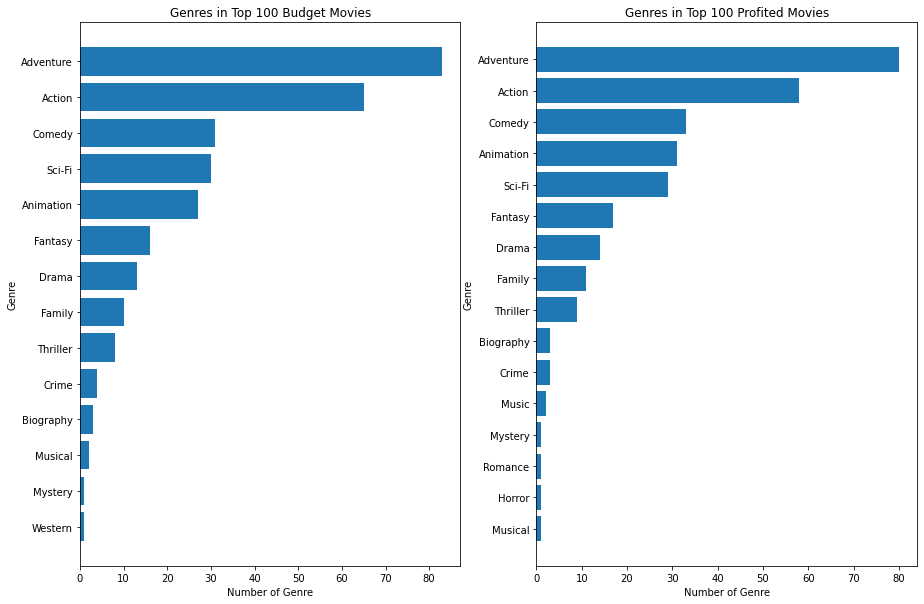

In [14]:
#Make a bar chart to represent genres in top 100 budget movies and top 100 profited movies

fig, ax = plt.subplots(1,2,figsize=(15, 10))

x = list(top_100_budget_genre_dict.keys())
height = list(top_100_budget_genre_dict.values())

ax[0].barh(x, height)
ax[0].set_title('Genres in Top 100 Budget Movies')
ax[0].set_xlabel('Number of Genre')
ax[0].set_ylabel('Genre')

x2 = list(top_100_profit_genre_dict.keys())
height2 = list(top_100_profit_genre_dict.values())

ax[1].barh(x2, height2)
ax[1].set_title('Genres in Top 100 Profited Movies')
ax[1].set_xlabel('Number of Genre')
ax[1].set_ylabel('Genre')

plt.savefig('images/genres_in_top_100_profited_budget_movies.png')

Since we saw which genres are popular, we will see which set of genres are popular in most profited movies.

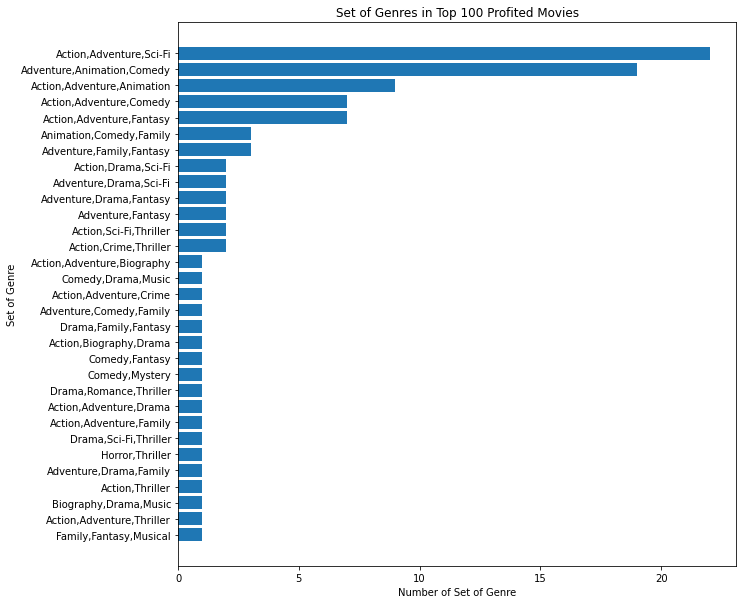

In [15]:
# Make a list of top 100 genres
top_100_profit_genre_set_list = list(condensed_profit['genres'].iloc[:100])

top_100_profit_genre_set_dict = {}

# Make a dictionary to count number of sets of genres
for genre in top_100_profit_genre_set_list:
    if genre in top_100_profit_genre_set_dict.keys():
        top_100_profit_genre_set_dict[genre] += 1
    else:
        top_100_profit_genre_set_dict[genre] = 1

# Sort the dictionary by count
top_100_profit_genre_set_dict = dict(sorted(top_100_profit_genre_set_dict.items(), key=lambda x : x[1]))

#Make a bar chart to represent genres in top 100 profited movies
fig, ax = plt.subplots(figsize=(10, 10))

x = list(top_100_profit_genre_set_dict.keys())
height = list(top_100_profit_genre_set_dict.values())

ax.barh(x, height)
ax.set_title('Set of Genres in Top 100 Profited Movies')
ax.set_xlabel('Number of Set of Genre')
ax.set_ylabel('Set of Genre')

plt.savefig('images/set_of_genres_top_100_profited_movies.png')

### Conclusion

From looking at the bar graph, we can see that Adventure, Action, Comedy, Animation, and Sci-Fi were the top 5 popular genres and "Action, Adventure, Sci-Fi" and "Adventure, Animation, Comedy" were the top 2 popular sets of genre.